# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [3]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

from sklearn.model_selection import train_test_split

cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)



print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



Примеры изображений для класса 0:


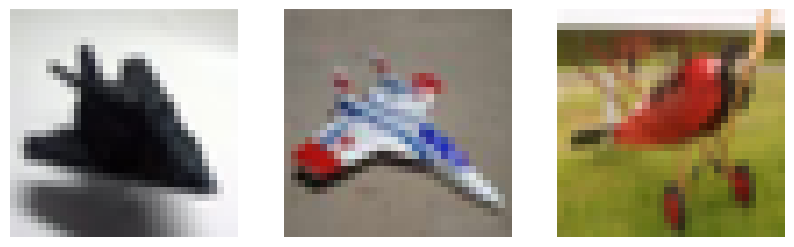

Примеры изображений для класса 1:


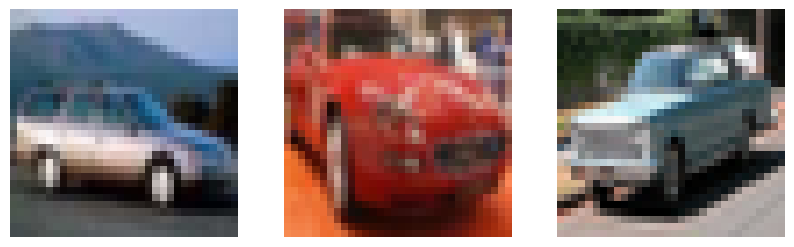

Примеры изображений для класса 2:


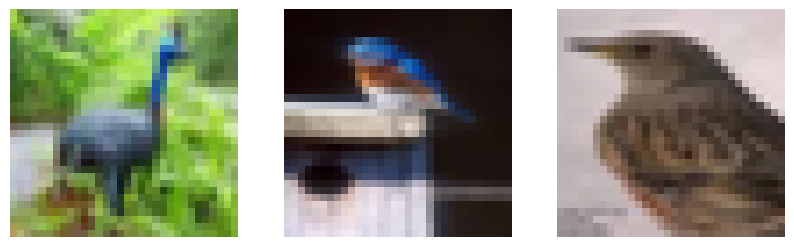

Примеры изображений для класса 3:


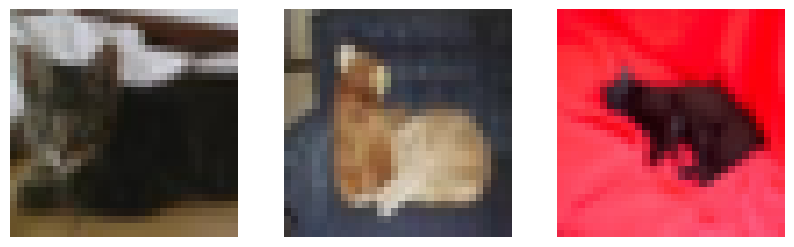

Примеры изображений для класса 4:


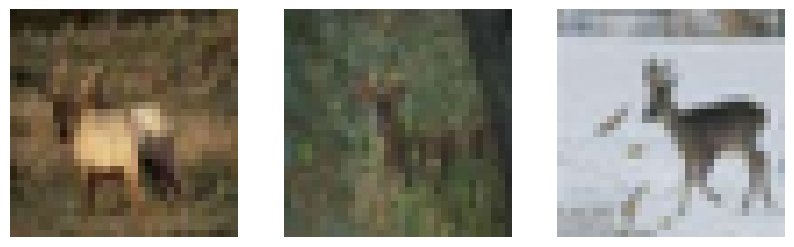

Примеры изображений для класса 5:


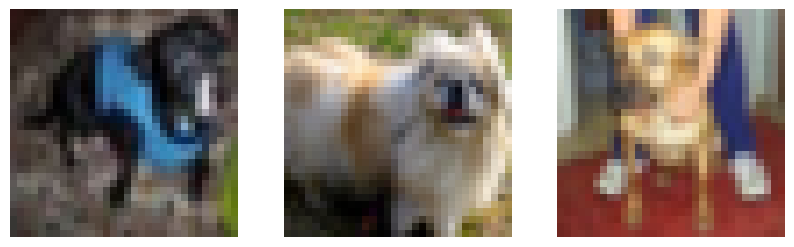

Примеры изображений для класса 6:


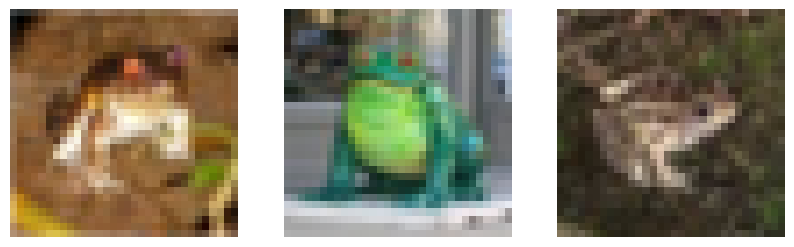

Примеры изображений для класса 7:


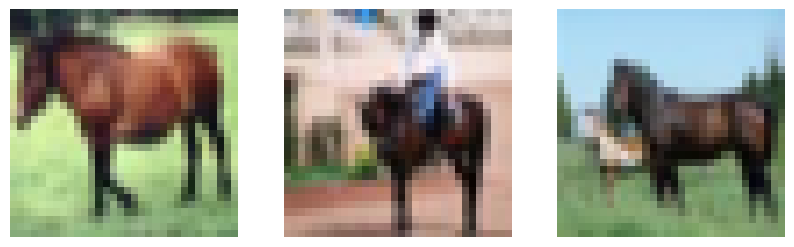

Примеры изображений для класса 8:


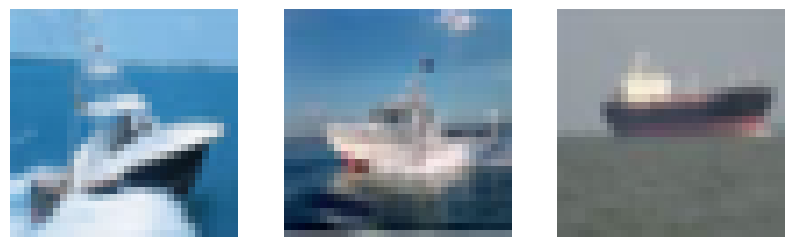

Примеры изображений для класса 9:


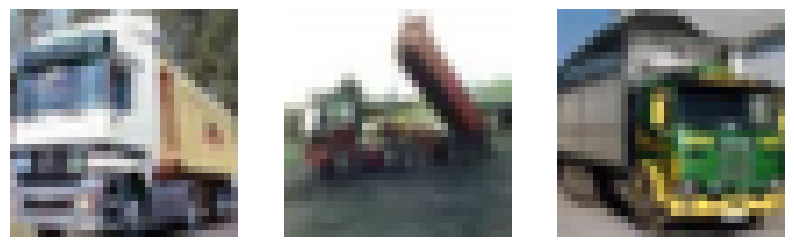

In [4]:
train_classes =  np.unique(y_train)
num_examples_per_class = 3

for i in train_classes:
    print(f"Примеры изображений для класса {i}:")
    fig, axes = plt.subplots(1, num_examples_per_class, figsize=(10, 3))
    indexes_curent_class = np.where(y_train == i)[0][:num_examples_per_class]
    for j in range(num_examples_per_class):
        plt.subplot(1, num_examples_per_class, j + 1)
        plt.imshow(X_train[indexes_curent_class[j]] / 255)
        plt.axis('off') 
    plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [5]:
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0],-1)
print(X_train.shape)

(50000, 32, 32, 3)
(50000, 3072)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [6]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [7]:
knn_result = classifier.predict(X_test, k=10)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


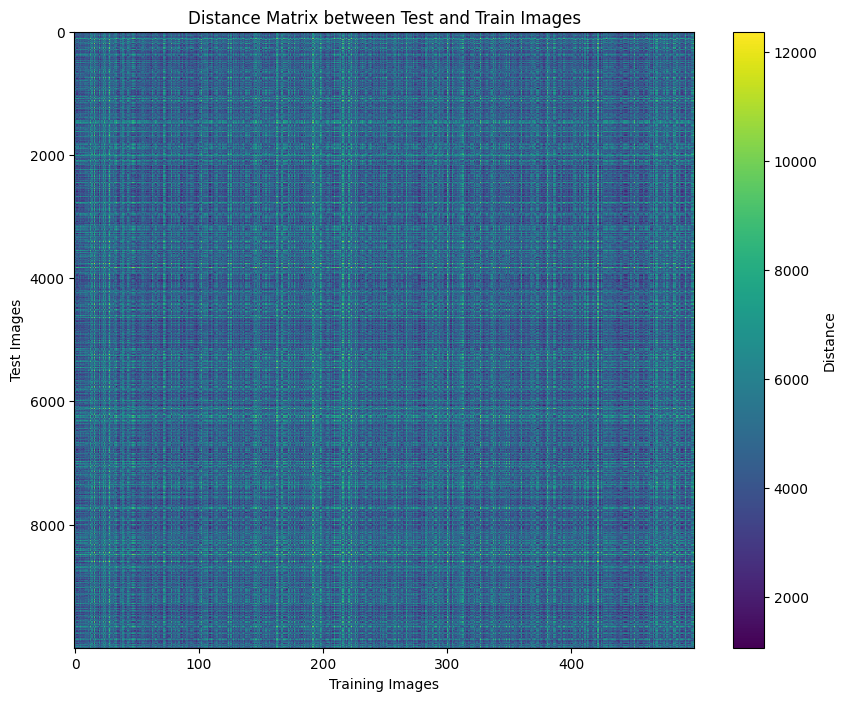

In [8]:
dists = classifier.compute_distances_no_loops(X_test)

plt.imshow(dists, cmap='viridis', aspect='auto')
plt.colorbar(label='Distance')
plt.xlabel('Training Images')
plt.ylabel('Test Images')
plt.title('Distance Matrix between Test and Train Images')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [9]:
print(np.mean(knn_result == y_test))

0.1459


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

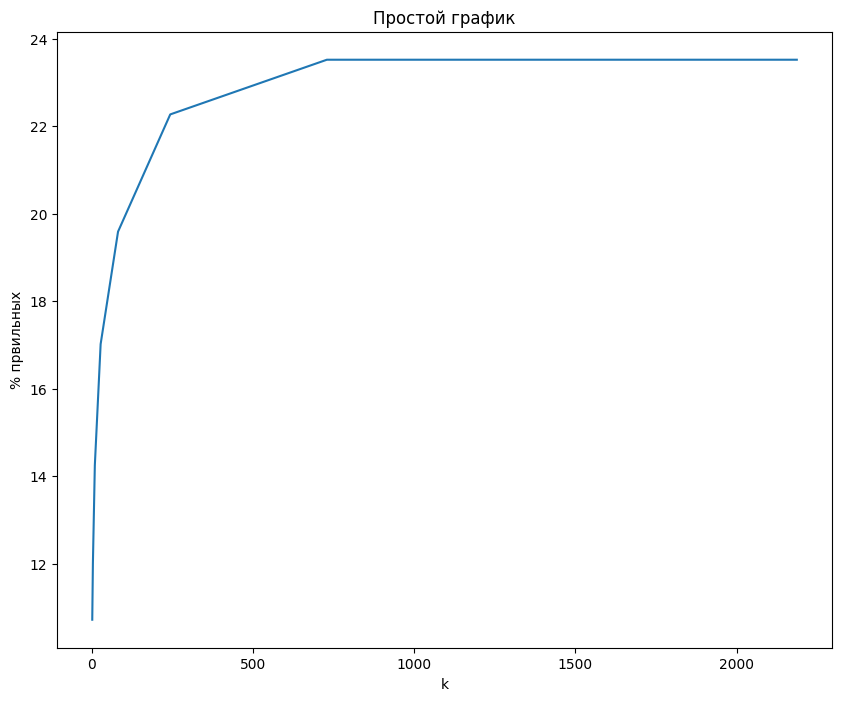

In [10]:
x = []
y = []
for i in range(8):
    ki = 3 ** i
    ki_knn_result = classifier.predict(X_test, k=ki)
    percent_correctly_classified = np.mean(ki_knn_result == y_test) * 100
    x.append(ki)
    y.append(percent_correctly_classified)

plt.plot(x, y)
plt.title('Простой график')
plt.xlabel('k')
plt.ylabel('% првильных')
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [11]:
from sklearn.model_selection import train_test_split
import sys
possible_k = [1, 5, 27, 111, 850, 1000, 2000]
opt_k = 0
opt_error = 0

num_folds = 3
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


for i in possible_k:
    curr_error = 0
    classifier.train(X_train, y_train)
    res = classifier.predict(X_val, k=i)
    curr_error = (np.mean(y_val == res))
    if opt_error < curr_error:
        opt_error = curr_error
        opt_k = i
print(opt_k)

1000


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.

In [12]:
classifier.train(X_train, y_train)
opt_k_knn_result = classifier.predict(X_test, k=111)
print((np.mean(y_test == opt_k_knn_result)))

0.194


1.11 Сделайте выводы по результатам 1 части задания.

По графику из здания 1.8 и найденному оптимальному значению можно сдлеать вывод, что существует отпимальное k, после которого точность начинает расти незначительно. Также стоит отметить, что данный метод k-ближавйших соседей прост в реализации и его не нужно обучать, как остальные алгоритмы машинного обучения, но он имеет высокую вычислительную сложность. Максимальная точность в районе 23%.

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [1]:
from sklearn.model_selection import train_test_split
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10

cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validate data shape: ', X_val.shape)
print('Validate labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (40000, 3072)
Training labels shape:  (40000,)
Validate data shape:  (10000, 3072)
Validate labels shape:  (10000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

[130.7684   136.171275 132.65505  130.20785  135.563275 131.963675
 131.0624   136.314875 132.6495   131.50975 ]


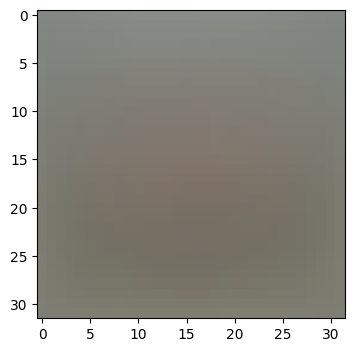

(40000, 3073) (10000, 3073) (10000, 3073)


In [2]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [3]:
from scripts.classifiers.linear_svm import svm_loss_naive
import time

W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_train, y_train, 0.000005)
print('loss: %f' % (loss, ))

loss: 9.188566



2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [4]:

loss, grad = svm_loss_naive(W, X_train, y_train, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, X_train, y_train, 5e1)
f = lambda w: svm_loss_naive(w, X_train, y_train, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 2.088640 analytic: 2.091013, relative error: 5.676529e-04
numerical: -12.950385 analytic: -12.948818, relative error: 6.050314e-05
numerical: 8.600534 analytic: 8.602260, relative error: 1.002990e-04
numerical: 2.139100 analytic: 2.139976, relative error: 2.047342e-04
numerical: 18.479600 analytic: 18.475761, relative error: 1.039040e-04
numerical: -13.642151 analytic: -13.640689, relative error: 5.358492e-05
numerical: 2.045721 analytic: 2.046665, relative error: 2.307261e-04
numerical: -5.265535 analytic: -5.266809, relative error: 1.210124e-04
numerical: 3.761595 analytic: 3.758356, relative error: 4.306915e-04
numerical: -1.472505 analytic: -1.475802, relative error: 1.118315e-03
numerical: 3.481058 analytic: 3.479965, relative error: 1.570072e-04
numerical: 15.408410 analytic: 15.409410, relative error: 3.245406e-05
numerical: 0.876659 analytic: 0.877485, relative error: 4.703779e-04
numerical: 24.690169 analytic: 24.693600, relative error: 6.948745e-05
numerical: -19.3

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [5]:
from scripts.classifiers.linear_svm import svm_loss_vectorized
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_train, y_train, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_train, y_train, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 6.178193s
Vectorized loss and gradient: computed in 0.118988s
difference: 0.000000


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [6]:
from scripts.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 793.860469
iteration 100 / 1500: loss 288.411593
iteration 200 / 1500: loss 108.460361
iteration 300 / 1500: loss 42.810216
iteration 400 / 1500: loss 19.220646
iteration 500 / 1500: loss 9.954801
iteration 600 / 1500: loss 6.673985
iteration 700 / 1500: loss 6.601703
iteration 800 / 1500: loss 5.542542
iteration 900 / 1500: loss 5.483187
iteration 1000 / 1500: loss 5.655075
iteration 1100 / 1500: loss 5.110870
iteration 1200 / 1500: loss 4.982077
iteration 1300 / 1500: loss 5.414894
iteration 1400 / 1500: loss 5.135097
That took 3.810567s


In [7]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.371625
validation accuracy: 0.361700


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [16]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e2, 5e2]

opt_learning_rates = 0
opt_regularization_strengths = 0

last_accuracy = 0
for rate in learning_rates:
    for regularization in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train, y_train, learning_rate=rate, reg=regularization,
                      num_iters=5000)
        y_cross_val_pred = svm.predict(X_val)
        accuracy = np.mean(y_val == y_cross_val_pred)
        if accuracy > last_accuracy:
            opt_learning_rates = rate
            opt_regularization_strengths = regularization 
            last_accuracy = accuracy 
        print('learning_rates: %.7f , regularization_strengths: %f, validation accuracy: %.8f' % (rate, regularization, accuracy))

svm = LinearSVM()
svm.train(X_train, y_train, learning_rate=opt_learning_rates, reg=regularization,
                      num_iters=5000)
y_test_pred = svm.predict(X_test)
print('\ntest accuracy: %.8f' % (np.mean(y_test == y_test_pred)))

learning_rates: 0.0000001 , regularization_strengths: 250.000000, validation accuracy: 0.34570000
learning_rates: 0.0000001 , regularization_strengths: 500.000000, validation accuracy: 0.36580000
learning_rates: 0.0000500 , regularization_strengths: 250.000000, validation accuracy: 0.28230000
learning_rates: 0.0000500 , regularization_strengths: 500.000000, validation accuracy: 0.22730000

test accuracy: 0.35850000


2.9 Сделайте выводы по второй части задания

 С помощью SVM удалось получить бОльшую точность (почти 36%) нежели с knn. Также стоит отметить, что с помощью SVM предсказания вычисляются гораздо быстрее, когда как обучение дольше. 

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [9]:
from sklearn.model_selection import train_test_split
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10

cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Validate data shape: ', X_val.shape)
print('Validate labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (40000, 3072)
Training labels shape:  (40000,)
Validate data shape:  (10000, 3072)
Validate labels shape:  (10000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

[130.7684   136.171275 132.65505  130.20785  135.563275 131.963675
 131.0624   136.314875 132.6495   131.50975 ]


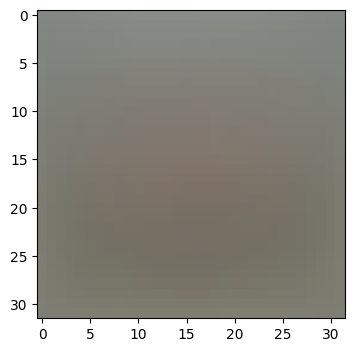

(40000, 3073) (10000, 3073) (10000, 3073)


In [10]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [11]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_train, y_train, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.333846
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [12]:
loss, grad = softmax_loss_naive(W, X_train, y_train, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_train, y_train, 5e1)
f = lambda w: softmax_loss_naive(w, X_train, y_train, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -3.153821 analytic: -3.153820, relative error: 7.129662e-09
numerical: 1.237990 analytic: 1.237990, relative error: 2.895403e-08
numerical: -1.695288 analytic: -1.695288, relative error: 8.766092e-09
numerical: 0.611396 analytic: 0.611396, relative error: 5.034379e-09
numerical: -3.587473 analytic: -3.587474, relative error: 1.899358e-08
numerical: 0.216890 analytic: 0.216890, relative error: 4.366273e-07
numerical: -3.589354 analytic: -3.589355, relative error: 1.852434e-08
numerical: -0.133980 analytic: -0.133980, relative error: 9.612638e-08
numerical: 3.945027 analytic: 3.945027, relative error: 5.300855e-09
numerical: 1.113451 analytic: 1.113451, relative error: 3.591027e-08
numerical: 0.149762 analytic: 0.149762, relative error: 4.458139e-07
numerical: -6.202567 analytic: -6.202567, relative error: 8.927274e-09
numerical: 0.063325 analytic: 0.063325, relative error: 2.957356e-07
numerical: 1.165275 analytic: 1.165275, relative error: 5.497785e-08
numerical: 1.435761 an

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [13]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_train, y_train, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_train, y_train, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.333846e+00 computed in 5.448607s
vectorized loss: 2.333846e+00 computed in 0.113981s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [14]:
from scripts.classifiers import Softmax

softmax = Softmax()

softmax.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)

y_train_pred = softmax.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = softmax.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))
y_test_pred = softmax.predict(X_test)
print('test accuracy: %f' % (np.mean(y_test == y_test_pred), ))

iteration 0 / 1500: loss 392.133912
iteration 100 / 1500: loss 236.846537
iteration 200 / 1500: loss 143.891552
iteration 300 / 1500: loss 87.886254
iteration 400 / 1500: loss 53.788186
iteration 500 / 1500: loss 33.355692
iteration 600 / 1500: loss 20.956729
iteration 700 / 1500: loss 13.510396
iteration 800 / 1500: loss 9.015695
iteration 900 / 1500: loss 6.283972
iteration 1000 / 1500: loss 4.591364
iteration 1100 / 1500: loss 3.557351
iteration 1200 / 1500: loss 2.973590
iteration 1300 / 1500: loss 2.586446
iteration 1400 / 1500: loss 2.437827
training accuracy: 0.351700
validation accuracy: 0.343000
test accuracy: 0.349000


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [17]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e2, 5e2]

opt_learning_rates = 0
opt_regularization_strengths = 0

last_accuracy = 0
for rate in learning_rates:
    for regularization in regularization_strengths:
        softmax = Softmax()
        softmax.train(X_train, y_train, learning_rate=rate, reg=regularization,
                      num_iters=1500)
        y_cross_val_pred = softmax.predict(X_val)
        accuracy = np.mean(y_val == y_cross_val_pred)
        if accuracy > last_accuracy:
            opt_learning_rates = rate
            opt_regularization_strengths = regularization 
            last_accuracy = accuracy 
        print('learning_rates: %.7f , regularization_strengths: %f, validation accuracy: %.8f' % (rate, regularization, accuracy))


softmax = Softmax()
softmax.train(X_train, y_train, learning_rate=opt_learning_rates, reg=regularization,
                      num_iters=1500)
y_test_pred = softmax.predict(X_test)
print('\ntest accuracy: %.8f' % (np.mean(y_test == y_test_pred)))

learning_rates: 0.0000001 , regularization_strengths: 250.000000, validation accuracy: 0.25680000
learning_rates: 0.0000001 , regularization_strengths: 500.000000, validation accuracy: 0.24150000
learning_rates: 0.0000500 , regularization_strengths: 250.000000, validation accuracy: 0.23270000
learning_rates: 0.0000500 , regularization_strengths: 500.000000, validation accuracy: 0.19080000

test accuracy: 0.24690000


3.10 Сделайте выводы по третьей части задания

С помощью Softmax удалось получить бОльшую точность (чуть более 33%) нежели с knn. Скорости обучения и предсказания Softmax и SVM приблизительно равные